In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

from datetime import datetime, timedelta
from keras.models import load_model, Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout, ActivityRegularization
from keras.callbacks import TensorBoard

from utilities_activity7 import (
    create_groups, split_lstm_input, 
    train_model, plot_two_series, rmse, 
    mape, denormalize)

np.random.seed(0)

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [3]:
test['date'] = test['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [4]:
train_data = create_groups(
    train['close_point_relative_normalization'][2:].values)
test_data = create_groups(
    test['close_point_relative_normalization'][:-3].values)

In [5]:
X_train, Y_train = split_lstm_input(train_data)

In [6]:
model_v0 = load_model('bitcoin_lstm_v0.h5')

In [7]:
def train_model(model, X, Y, epochs, version, run_number):
    model_history = model.fit(x = X,y=Y, epochs = epochs)
    return model_history

In [8]:
period_length = 7
number_of_periods = 76
batch_size = 1

In [9]:
model_v1 = Sequential()

model_v1.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))   # note return_sequences is now true

model_v1.add(LSTM(units = period_length,
                 batch_input_shape= (batch_size,number_of_periods,period_length),
                 input_shape = (number_of_periods, period_length),
                 return_sequences = False, stateful = False))
model_v1.add(Dense(units=period_length))
model_v1.add(Activation("linear"))

model_v1.compile(loss="mse", optimizer="rmsprop")

In [10]:
train_model(model=model_v1, X=X_train, Y=Y_train, epochs=100, version=1, run_number=0)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 2/100
1/1 [==============================] - 0s 991us/step - loss: 0.0025
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7578e-04
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5323e-04
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.4651e-04
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 5.5357e-04
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 4.7285e-04
Epoch 13/100
1/1 [=====================

1/1 [==============================] - 0s 4ms/step - loss: 2.3842e-06


In [11]:
model_v2 = Sequential()

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v2.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v2.add(Dense(units=period_length))
model_v2.add(Activation("linear"))

model_v2.compile(loss="mse", optimizer="rmsprop")

In [12]:
train_model(model = model_v2,X = X_train ,Y = Y_train,epochs = 100,run_number = 0,version =1)

Epoch 1/100
1/1 [==============================] - 0s 996us/step - loss: 0.0044
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0597e-04
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.7916e-04
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 6.6998e-04
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 5.7580e-04
Epoch 13/100
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 5.0016e-06


In [13]:
train_model(model=model_v2, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 998us/step - loss: 3.6506e-06
Epoch 2/300
1/1 [==============================] - 0s 3ms/step - loss: 2.8666e-06
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 2.6568e-06
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 2.6930e-06
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 3.2233e-06
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 4.1298e-06
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 6.1003e-06
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 8.7165e-06
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 1.3005e-05
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 1.4892e-05
Epoch 11/300
1/1 [==============================] - 0s 3ms/step - loss: 1.6540e-05
Epoch 12/300
1/1 [==============================] - 0s 3ms/step - loss: 1.3057e-05
Epoch 13/30

1/1 [==============================] - 0s 3ms/step - loss: 7.6793e-06
Epoch 100/300
1/1 [==============================] - 0s 3ms/step - loss: 5.1231e-06
Epoch 101/300
1/1 [==============================] - 0s 3ms/step - loss: 4.3123e-06
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 3.4196e-06
Epoch 103/300
1/1 [==============================] - 0s 4ms/step - loss: 3.3395e-06
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1009e-06
Epoch 105/300
1/1 [==============================] - 0s 998us/step - loss: 3.5478e-06
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 4.2252e-06
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 7.2085e-06
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3745e-05
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 2.1085e-05
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 1.7437e-05
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 1.1657e-05
Epoch 197/300
1/1 [==============================] - 0s 3ms/step - loss: 8.2868e-06
Epoch 198/300
1/1 [==============================] - 0s 2ms/step - loss: 6.5980e-06
Epoch 199/300
1/1 [==============================] - 0s 4ms/step - loss: 4.7805e-06
Epoch 200/300
1/1 [==============================] - 0s 3ms/step - loss: 4.4018e-06
Epoch 201/300
1/1 [==============================] - 0s 999us/step - loss: 3.8284e-06
Epoch 202/300
1/1 [==============================] - 0s 3ms/step - loss: 3.5069e-06
Epoch 203/300
1/1 [==============================] - 0s 3ms/step - loss: 3.0274e-06
Epoch 204/300
1/1 [==============================] - 0s 3ms/step - loss: 2.8366e-06
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 2.7642e-06
Epoch 206/300
1/1 [==============================] - 0s 2ms/step - loss: 3.1498e-06
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 3.9501e-06
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 3.0492e-06
Epoch 294/300
1/1 [==============================] - 0s 2ms/step - loss: 5.0373e-06
Epoch 295/300
1/1 [==============================] - 0s 3ms/step - loss: 9.2611e-06
Epoch 296/300
1/1 [==============================] - 0s 3ms/step - loss: 1.4467e-05
Epoch 297/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2606e-05
Epoch 298/300
1/1 [==============================] - 0s 3ms/step - loss: 8.8080e-06
Epoch 299/300
1/1 [==============================] - 0s 3ms/step - loss: 5.0111e-06
Epoch 300/300
1/1 [==============================] - 0s 4ms/step - loss: 3.3326e-06


In [14]:
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

model_v3.add(Activation("linear"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [15]:
train_model(model=model_v3, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 998us/step - loss: 0.0026
Epoch 2/300
1/1 [==============================] - 0s 997us/step - loss: 0.0020
Epoch 3/300
1/1 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 9.4446e-04
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 8.2168e-04
Epoch 9/300
1/1 [==============================] - 0s 997us/step - loss: 7.1254e-04
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 6.1496e-04
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 5.2750e-04
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 4.4912e-04
Epoch 13/300
1/1 [===========

1/1 [==============================] - 0s 996us/step - loss: 9.6810e-06
Epoch 100/300
1/1 [==============================] - 0s 2ms/step - loss: 9.8891e-06
Epoch 101/300
1/1 [==============================] - 0s 2ms/step - loss: 9.7593e-06
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 9.8772e-06
Epoch 103/300
1/1 [==============================] - 0s 3ms/step - loss: 9.6575e-06
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 9.7083e-06
Epoch 105/300
1/1 [==============================] - 0s 998us/step - loss: 9.4538e-06
Epoch 106/300
1/1 [==============================] - 0s 997us/step - loss: 9.4990e-06
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 9.2700e-06
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 9.3559e-06
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 9.1868e-06
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 9.3369e-06


1/1 [==============================] - 0s 2ms/step - loss: 9.1948e-06
Epoch 197/300
1/1 [==============================] - 0s 2ms/step - loss: 9.0185e-06
Epoch 198/300
1/1 [==============================] - 0s 2ms/step - loss: 8.6114e-06
Epoch 199/300
1/1 [==============================] - 0s 2ms/step - loss: 7.6451e-06
Epoch 200/300
1/1 [==============================] - 0s 998us/step - loss: 6.9875e-06
Epoch 201/300
1/1 [==============================] - 0s 2ms/step - loss: 6.4683e-06
Epoch 202/300
1/1 [==============================] - 0s 2ms/step - loss: 6.6613e-06
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 7.3448e-06
Epoch 204/300
1/1 [==============================] - 0s 2ms/step - loss: 8.5900e-06
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 9.4033e-06
Epoch 206/300
1/1 [==============================] - 0s 998us/step - loss: 9.2616e-06
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 8.2780e-06
Ep

1/1 [==============================] - 0s 2ms/step - loss: 6.1880e-06
Epoch 293/300
1/1 [==============================] - 0s 2ms/step - loss: 5.2635e-06
Epoch 294/300
1/1 [==============================] - 0s 2ms/step - loss: 4.9017e-06
Epoch 295/300
1/1 [==============================] - 0s 995us/step - loss: 4.9816e-06
Epoch 296/300
1/1 [==============================] - 0s 2ms/step - loss: 5.7801e-06
Epoch 297/300
1/1 [==============================] - 0s 2ms/step - loss: 7.0715e-06
Epoch 298/300
1/1 [==============================] - 0s 996us/step - loss: 8.2811e-06
Epoch 299/300
1/1 [==============================] - 0s 3ms/step - loss: 8.4675e-06
Epoch 300/300
1/1 [==============================] - 0s 998us/step - loss: 7.5094e-06


In [16]:
model_v3 = Sequential()

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))

model_v3.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))

model_v3.add(Dense(units=period_length))

model_v3.add(Activation("tanh"))

model_v3.compile(loss="mse", optimizer="rmsprop")

In [17]:
train_model(model=model_v3, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 3/300
1/1 [==============================] - 0s 998us/step - loss: 0.0017
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 8.1311e-04
Epoch 7/300
1/1 [==============================] - 0s 998us/step - loss: 6.5342e-04
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 5.2796e-04
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 4.2910e-04
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 3.5124e-04
Epoch 11/300
1/1 [==============================] - 0s 995us/step - loss: 2.8996e-04
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4171e-04
Epoch 13/300
1/1 [==========

1/1 [==============================] - 0s 2ms/step - loss: 5.3432e-06
Epoch 100/300
1/1 [==============================] - 0s 2ms/step - loss: 6.3060e-06
Epoch 101/300
1/1 [==============================] - 0s 2ms/step - loss: 6.8748e-06
Epoch 102/300
1/1 [==============================] - 0s 994us/step - loss: 8.5422e-06
Epoch 103/300
1/1 [==============================] - 0s 998us/step - loss: 8.3272e-06
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 7.5335e-06
Epoch 105/300
1/1 [==============================] - 0s 996us/step - loss: 4.6864e-06
Epoch 106/300
1/1 [==============================] - 0s 998us/step - loss: 3.2049e-06
Epoch 107/300
1/1 [==============================] - 0s 3ms/step - loss: 2.0890e-06
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 1.7496e-06
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6946e-06
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 2.0636e-0

1/1 [==============================] - 0s 2ms/step - loss: 3.9536e-06
Epoch 196/300
1/1 [==============================] - 0s 2ms/step - loss: 4.5632e-06
Epoch 197/300
1/1 [==============================] - 0s 2ms/step - loss: 5.1833e-06
Epoch 198/300
1/1 [==============================] - 0s 997us/step - loss: 6.5330e-06
Epoch 199/300
1/1 [==============================] - 0s 2ms/step - loss: 6.7019e-06
Epoch 200/300
1/1 [==============================] - 0s 999us/step - loss: 6.4182e-06
Epoch 201/300
1/1 [==============================] - 0s 2ms/step - loss: 4.6888e-06
Epoch 202/300
1/1 [==============================] - 0s 2ms/step - loss: 3.5030e-06
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4397e-06
Epoch 204/300
1/1 [==============================] - 0s 998us/step - loss: 1.9448e-06
Epoch 205/300
1/1 [==============================] - 0s 998us/step - loss: 1.6513e-06
Epoch 206/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6831e-0

1/1 [==============================] - 0s 2ms/step - loss: 1.9953e-06
Epoch 292/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5755e-06
Epoch 293/300
1/1 [==============================] - 0s 3ms/step - loss: 1.5280e-06
Epoch 294/300
1/1 [==============================] - 0s 997us/step - loss: 1.6695e-06
Epoch 295/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4389e-06
Epoch 296/300
1/1 [==============================] - 0s 998us/step - loss: 4.1828e-06
Epoch 297/300
1/1 [==============================] - 0s 2ms/step - loss: 7.9192e-06
Epoch 298/300
1/1 [==============================] - 0s 2ms/step - loss: 1.0212e-05
Epoch 299/300
1/1 [==============================] - 0s 2ms/step - loss: 9.1875e-06
Epoch 300/300
1/1 [==============================] - 0s 2ms/step - loss: 5.1999e-06


In [18]:
model_v4 = Sequential()
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=True, stateful=False))
model_v4.add(Dropout(0.5))
model_v4.add(LSTM(
    units=period_length,
    batch_input_shape=(batch_size, number_of_periods, period_length),
    input_shape=(number_of_periods, period_length),
    return_sequences=False, stateful=False))
model_v4.add(Dropout(0.5))


model_v4.add(Dense(units=period_length))
model_v4.add(Activation("tanh"))
model_v4.compile(loss="mse", optimizer="rmsprop")

In [19]:
train_model(model=model_v4, X=X_train, Y=Y_train, epochs=300, version=3, run_number=0)

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3/300
1/1 [==============================] - 0s 998us/step - loss: 0.0040
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 6/300
1/1 [==============================] - 0s 995us/step - loss: 0.0019
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 10/300
1/1 [==============================] - 0s 996us/step - loss: 0.0032
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 13/300
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 3ms/step - loss: 2.7816e-04
Epoch 101/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1410e-04
Epoch 102/300
1/1 [==============================] - 0s 3ms/step - loss: 1.5434e-04
Epoch 103/300
1/1 [==============================] - 0s 2ms/step - loss: 3.4571e-04
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 9.2060e-05
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 2.6521e-04
Epoch 106/300
1/1 [==============================] - 0s 3ms/step - loss: 2.0084e-04
Epoch 107/300
1/1 [==============================] - 0s 996us/step - loss: 7.5516e-05
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 6.3917e-04
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 2.1957e-04
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 3.6560e-04
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 3.0168e-05
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 2.8702e-05
Epoch 197/300
1/1 [==============================] - 0s 998us/step - loss: 1.1626e-04
Epoch 198/300
1/1 [==============================] - 0s 997us/step - loss: 1.2484e-05
Epoch 199/300
1/1 [==============================] - 0s 998us/step - loss: 2.8354e-04
Epoch 200/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3637e-04
Epoch 201/300
1/1 [==============================] - 0s 2ms/step - loss: 2.0497e-05
Epoch 202/300
1/1 [==============================] - 0s 1ms/step - loss: 5.8307e-05
Epoch 203/300
1/1 [==============================] - 0s 2ms/step - loss: 2.4347e-05
Epoch 204/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2001e-04
Epoch 205/300
1/1 [==============================] - 0s 2ms/step - loss: 1.8050e-05
Epoch 206/300
1/1 [==============================] - 0s 998us/step - loss: 1.4368e-05
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 4.0567e-0

1/1 [==============================] - 0s 997us/step - loss: 9.8754e-06
Epoch 293/300
1/1 [==============================] - 0s 997us/step - loss: 9.6449e-05
Epoch 294/300
1/1 [==============================] - 0s 2ms/step - loss: 1.3530e-05
Epoch 295/300
1/1 [==============================] - 0s 997us/step - loss: 1.2621e-05
Epoch 296/300
1/1 [==============================] - 0s 2ms/step - loss: 1.9611e-06
Epoch 297/300
1/1 [==============================] - 0s 994us/step - loss: 2.5144e-05
Epoch 298/300
1/1 [==============================] - 0s 999us/step - loss: 1.0580e-05
Epoch 299/300
1/1 [==============================] - 0s 998us/step - loss: 2.0433e-05
Epoch 300/300
1/1 [==============================] - 0s 996us/step - loss: 1.6690e-04


In [20]:
combined_set = np.concatenate((train_data, test_data), axis=1)

def evaluate_model(model, kind='series'):
    if kind == 'series':
        predicted_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]
            predicted_weeks.append(model.predict(input_series))

        predicted_days = []
        for week in predicted_weeks:
            predicted_days += list(week[0])

        return predicted_days
    else:
        evaluated_weeks = []
        for i in range(0, test_data.shape[1]):
            input_series = combined_set[0:,i:i+77]

            X_test = input_series[0:,:-1].reshape(1, input_series.shape[1] - 1, 7)
            Y_test = input_series[0:,-1:][0]

            result = model.evaluate(x=X_test, y=Y_test, verbose=0)
            evaluated_weeks.append(result)
            
            return evaluated_weeks


In [21]:
def plot_weekly_mse(series, model_name, color):
    """Plot weekly MSE."""
    ax = pd.Series(series).plot(drawstyle="steps-post",
                                figsize=(14,4),
                                color=color,
                                grid=True,
                                label=model_name,
                                alpha=0.7,
                                title='Mean Squared Error (MSE) for Test Data (all models)'.format(model_name))

    ax.set_xticks(range(0, len(series)))
    ax.set_xlabel("Predicted Week")
    ax.set_ylabel("MSE")

    return ax

In [22]:
def plot_weekly_predictions(predicted_days, name, display_plot=True, 
                            variable='close'):
    """Plot weekly predictions and calculate RMSE and MAPE."""
    
    # Create dataframe to store predictions and associated dates
    last_day = datetime.strptime(train['date'].max(), '%Y-%m-%d')
    list_of_days = []
    for days in range(1, len(predicted_days) + 1):
        D = (last_day + timedelta(days=days)).strftime('%Y-%m-%d')
        list_of_days.append(D)
    
    predicted = pd.DataFrame({
        'date': list_of_days,
        'close_point_relative_normalization': predicted_days
    })
    
    # Convert `date` variable to datetime
    predicted['date'] = predicted['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

    # Create iso_week column in `predicted` dataframe
    predicted['iso_week'] = predicted['date'].apply(lambda x: x.strftime('%Y-%U'))

    # Denormalize predictions
    predicted_close = predicted.groupby('iso_week').apply(lambda x: denormalize(test[:-3], x))

    # Plot denormalized predictions and observed values
    plot_two_series(test[:-3], predicted_close,variable=variable,title=f'{name}: Predictions per Week')
    
    # Calculate RMSE and MAPE
    print(f'RMSE: {rmse(test[:-2][variable], predicted_close[variable]):.2f}')
    print(f'MAPE: {mape(test[:-2][variable], predicted_close[variable]):.2f}')

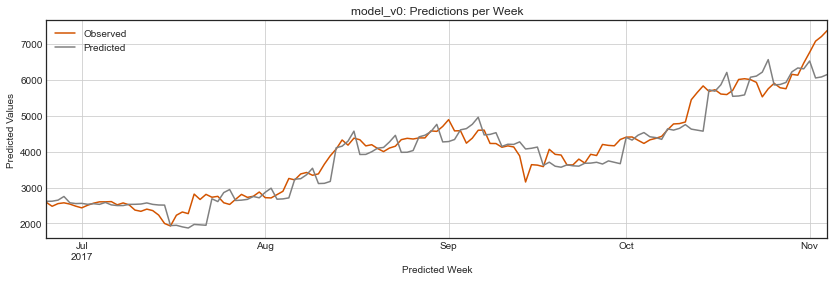

RMSE: 382.88
MAPE: 6.84


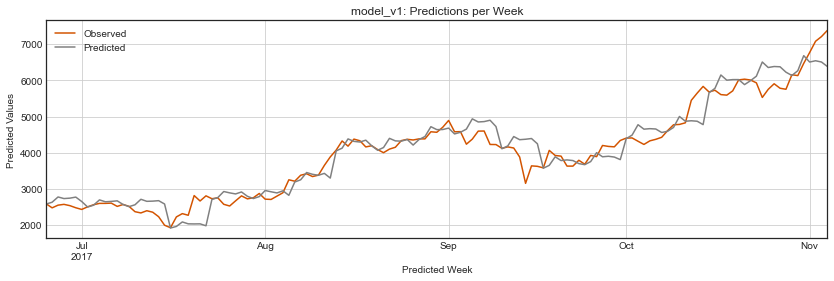

RMSE: 354.48
MAPE: 6.58


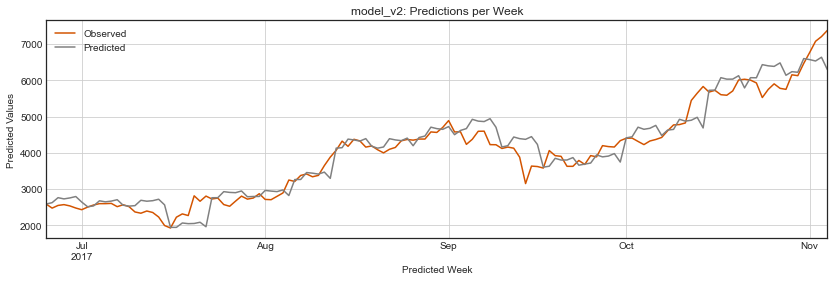

RMSE: 357.59
MAPE: 6.74


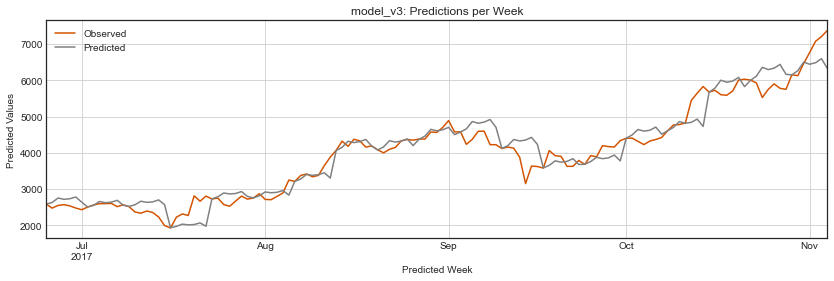

RMSE: 345.37
MAPE: 6.32


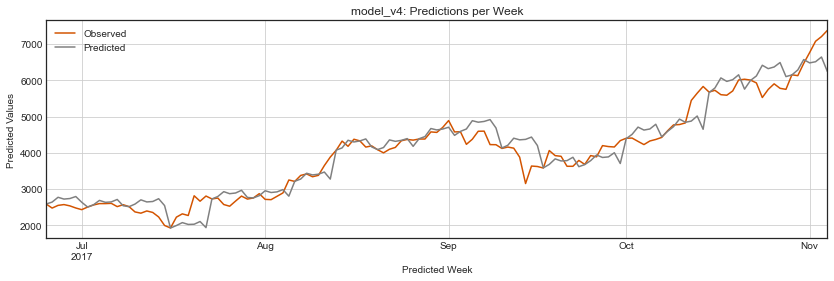

RMSE: 355.17
MAPE: 6.53


In [23]:
models = [model_v0, model_v1, model_v2, model_v3, model_v4]
for i, M in enumerate(models):
    predicted_days = evaluate_model(M, kind='series')
    plot_weekly_predictions(predicted_days, f'model_v{i}')